In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
den = pd.read_csv('datasets\\dengue.csv')

In [4]:
den

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


Correlation Matrix:
               Dengue_Cases  Dengue_Deaths
Dengue_Cases       1.000000       0.038322
Dengue_Deaths      0.038322       1.000000


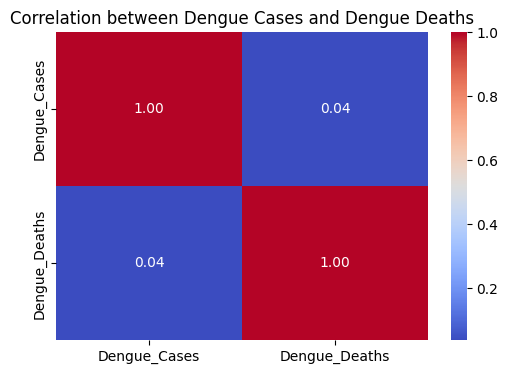

In [6]:
correlation_matrix = den[['Dengue_Cases', 'Dengue_Deaths']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualization: Heatmap of Correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Dengue Cases and Dengue Deaths")
plt.show()

<h1>1. How many Dengue cases are reported each month?</h1>

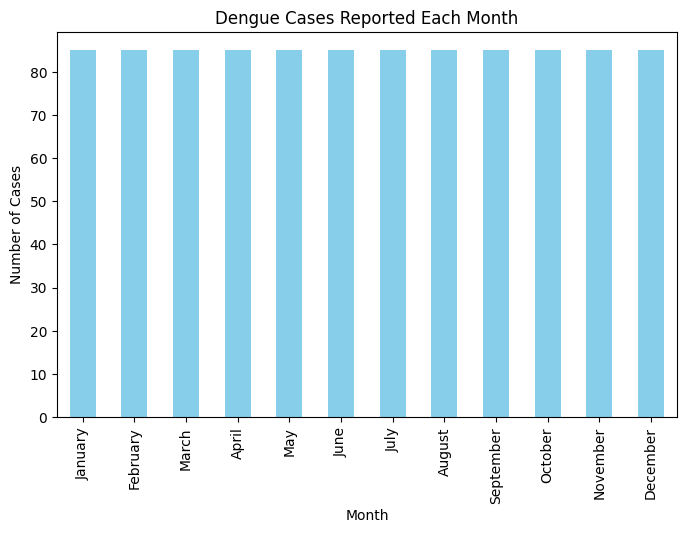

In [8]:
plt.figure(figsize=(8, 5))
den['Month'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Dengue Cases Reported Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.show()


<h1>Which year had the most Dengue cases?</h1>

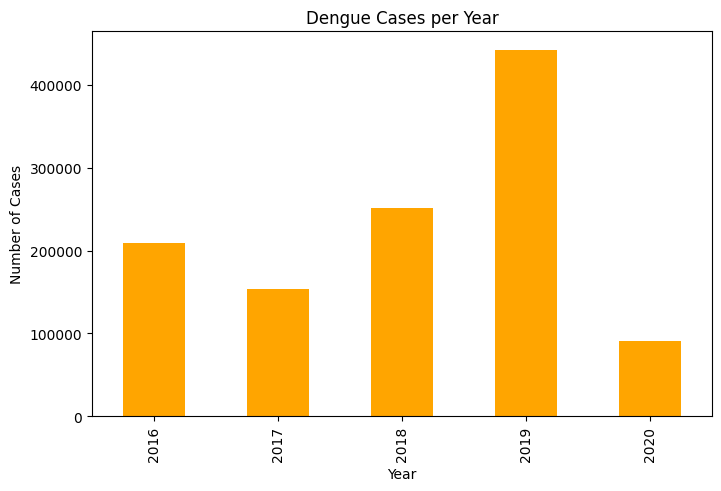

In [10]:
plt.figure(figsize=(8, 5))
den.groupby('Year')['Dengue_Cases'].sum().plot(kind='bar', color='orange')
plt.title('Dengue Cases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()


<h1>3. Is there a difference in Dengue cases across regions?</h1>

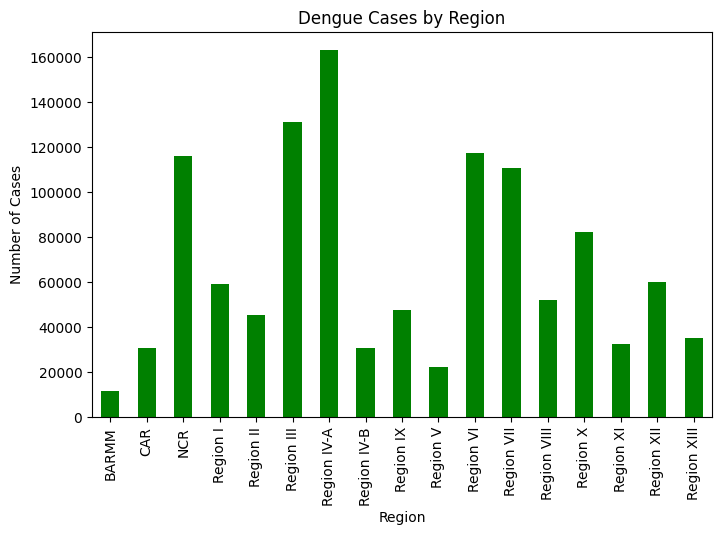

In [12]:
plt.figure(figsize=(8, 5))
den.groupby('Region')['Dengue_Cases'].sum().plot(kind='bar', color='green')
plt.title('Dengue Cases by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cases')
plt.show()


<h1>Which month has the most Dengue deaths?</h1>

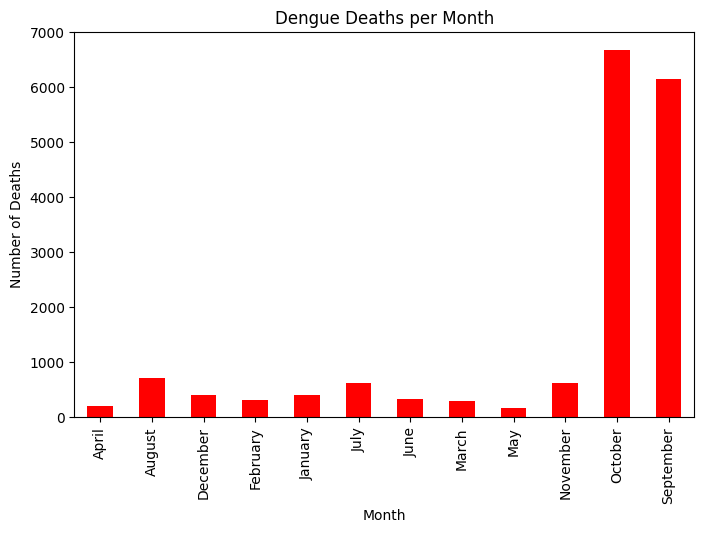

In [14]:
plt.figure(figsize=(8, 5))
den.groupby('Month')['Dengue_Deaths'].sum().plot(kind='bar', color='red')
plt.title('Dengue Deaths per Month')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.show()


<h1>5. Do Dengue cases increase or decrease over the years?</h1>

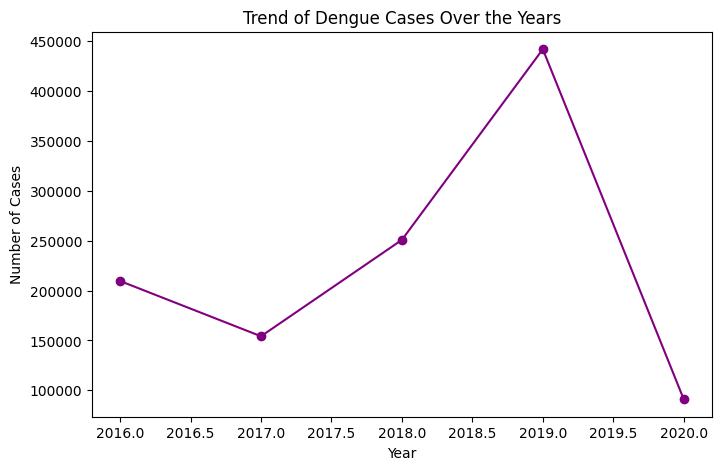

In [16]:
plt.figure(figsize=(8, 5))
den.groupby('Year')['Dengue_Cases'].sum().plot(kind='line', marker='o', color='purple')
plt.title('Trend of Dengue Cases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()


<h1>6. Are there any months with unusually high Dengue cases?</h1>

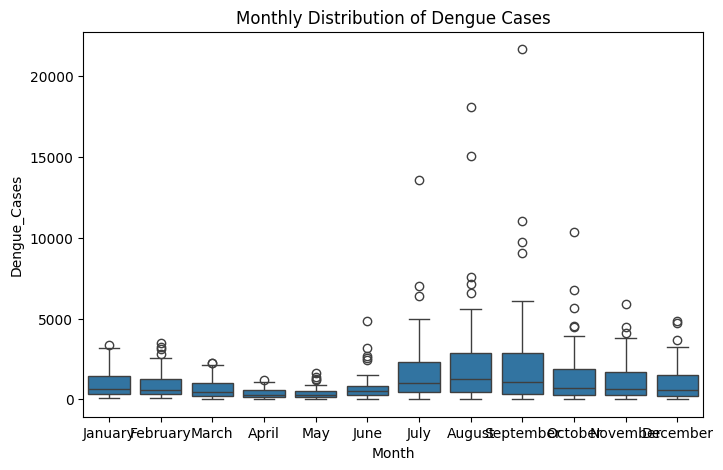

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Month', y='Dengue_Cases', data=den)
plt.title('Monthly Distribution of Dengue Cases')
plt.show()


<h1>7. Do certain regions have more Dengue deaths than others?</h1>

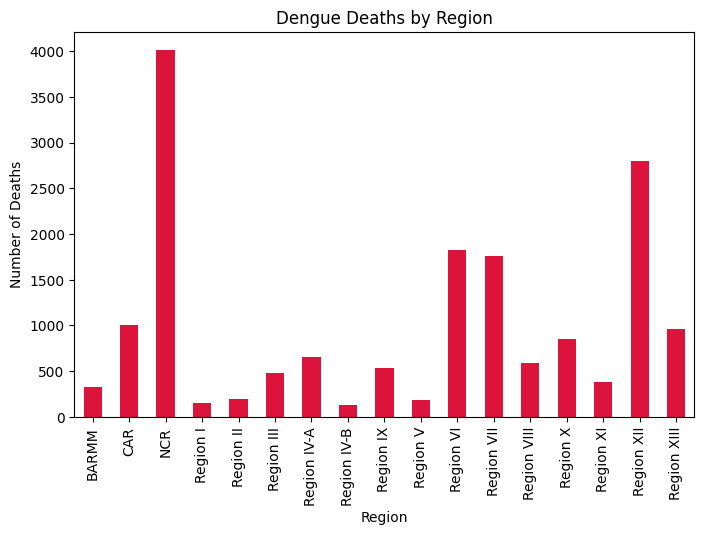

In [18]:
plt.figure(figsize=(8, 5))
den.groupby('Region')['Dengue_Deaths'].sum().plot(kind='bar', color='crimson')
plt.title('Dengue Deaths by Region')
plt.xlabel('Region')
plt.ylabel('Number of Deaths')
plt.show()


<h1>8. Is there any month where cases spike unexpectedly?</h1>

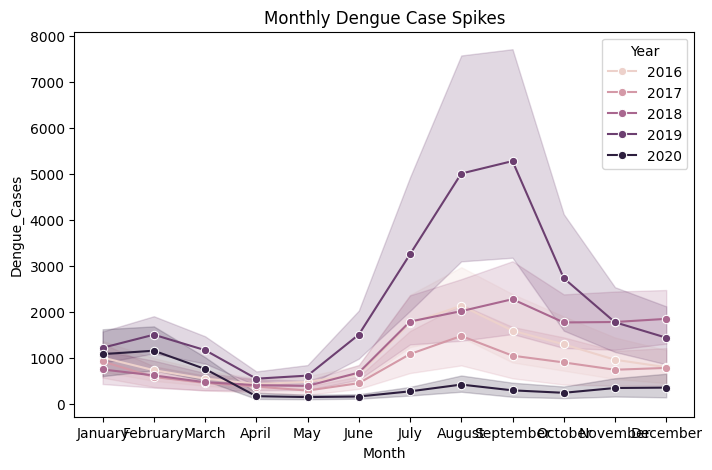

In [19]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=den, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.title('Monthly Dengue Case Spikes')
plt.show()


<h1>9. What’s the average number of Dengue cases per month?</h1>

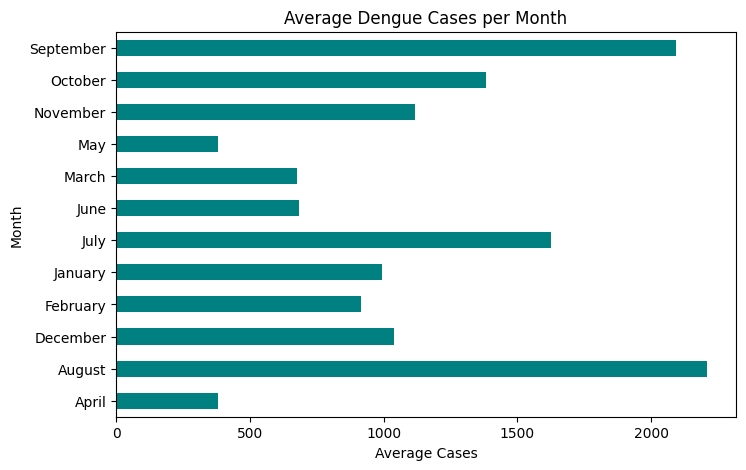

In [20]:
plt.figure(figsize=(8, 5))
den.groupby('Month')['Dengue_Cases'].mean().plot(kind='barh', color='teal')
plt.title('Average Dengue Cases per Month')
plt.xlabel('Average Cases')
plt.ylabel('Month')
plt.show()


<h1>10. Do Dengue deaths follow the same pattern as cases?</h1>

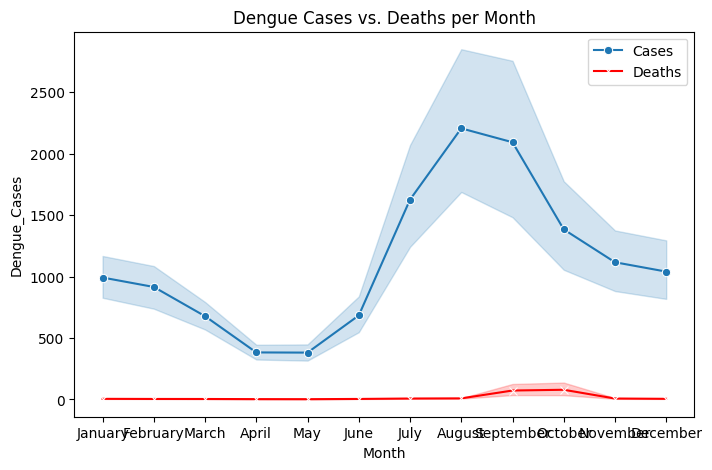

In [21]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=den, x='Month', y='Dengue_Cases', label='Cases', marker='o')
sns.lineplot(data=den, x='Month', y='Dengue_Deaths', label='Deaths', marker='x', color='red')
plt.title('Dengue Cases vs. Deaths per Month')
plt.show()


<h1>11. Which region has the least Dengue cases?</h1>

Region with the least Dengue cases: BARMM


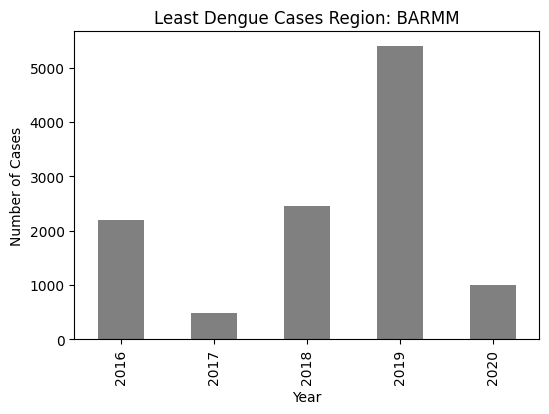

In [23]:
# Find the region with the least Dengue cases
least_cases_region = den.groupby('Region')['Dengue_Cases'].sum().idxmin()

# Display the region with the least cases
print(f"Region with the least Dengue cases: {least_cases_region}")

# Plot the least Dengue cases region
plt.figure(figsize=(6, 4))
den[den['Region'] == least_cases_region].groupby('Year')['Dengue_Cases'].sum().plot(kind='bar', color='gray')
plt.title(f'Least Dengue Cases Region: {least_cases_region}')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()


<h1>12. Which year had the highest number of Dengue deaths?</h1>

Year with the highest Dengue deaths: 2016


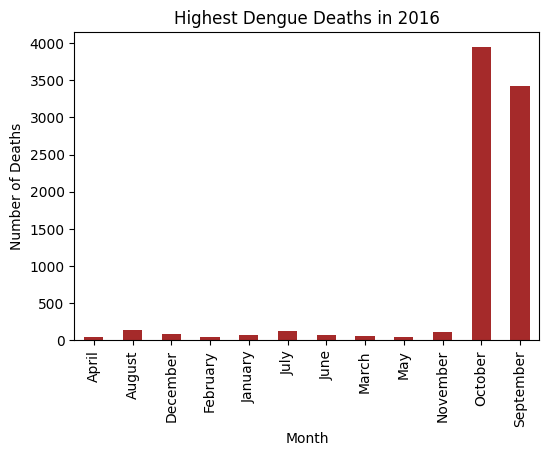

In [24]:
# Find the year with the highest Dengue deaths
highest_deaths_year = den.groupby('Year')['Dengue_Deaths'].sum().idxmax()

# Display the year with the highest deaths
print(f"Year with the highest Dengue deaths: {highest_deaths_year}")

# Plot the year with the highest Dengue deaths
plt.figure(figsize=(6, 4))
den[den['Year'] == highest_deaths_year].groupby('Month')['Dengue_Deaths'].sum().plot(kind='bar', color='brown')
plt.title(f'Highest Dengue Deaths in {highest_deaths_year}')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.show()


<h1>13. Is there a month when deaths are unusually high?</h1>

Months with unusually high Dengue deaths:
Month
October      6670
September    6148
August        714
November      613
July          611
Name: Dengue_Deaths, dtype: int64


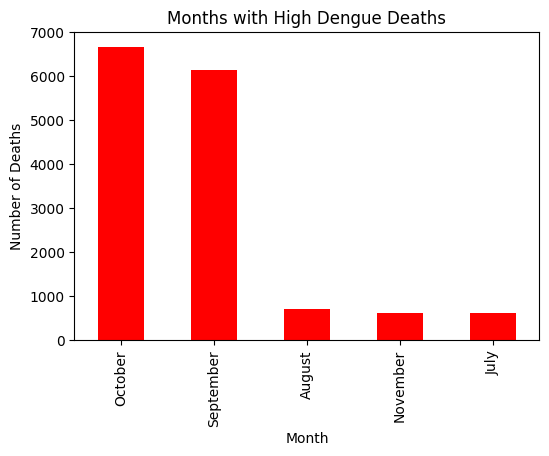

In [25]:
# Identify months with unusually high deaths
high_death_months = den.groupby('Month')['Dengue_Deaths'].sum().sort_values(ascending=False).head()

# Display the months with high deaths
print("Months with unusually high Dengue deaths:")
print(high_death_months)

# Plot the months with high deaths
plt.figure(figsize=(6, 4))
high_death_months.plot(kind='bar', color='red')
plt.title('Months with High Dengue Deaths')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.show()


<h1>14. Is there a difference between cases in dry and rainy seasons?</h1>

Dengue cases in Dry vs Rainy seasons:
Season
Dry      585576
Rainy    561849
Name: Dengue_Cases, dtype: int64


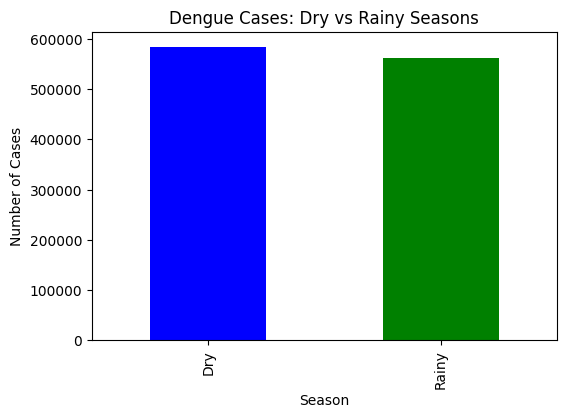

In [27]:
# Add a season column based on the month
den['Season'] = den['Month'].apply(lambda x: 'Rainy' if x in ['June', 'July', 'August', 'September'] else 'Dry')

# Group by season and calculate total cases
season_cases = den.groupby('Season')['Dengue_Cases'].sum()

# Display the number of cases per season
print("Dengue cases in Dry vs Rainy seasons:")
print(season_cases)

# Plot the cases per season
plt.figure(figsize=(6, 4))
season_cases.plot(kind='bar', color=['blue', 'green'])
plt.title('Dengue Cases: Dry vs Rainy Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Cases')
plt.show()


<h1>15. Do regions with more cases always have more deaths?</h1>

Total Dengue cases and deaths by region:
             Dengue_Cases  Dengue_Deaths
Region                                  
BARMM               11537            332
CAR                 30582           1008
NCR                115966           4008
Region I            59066            157
Region II           45141            193
Region III         131064            482
Region IV-A        163029            652
Region IV-B         30849            130
Region IX           47781            532
Region V            22167            185
Region VI          117523           1825
Region VII         110683           1760
Region VIII         51983            585
Region X            82437            848
Region XI           32522            385
Region XII          59802           2796
Region XIII         35293            966


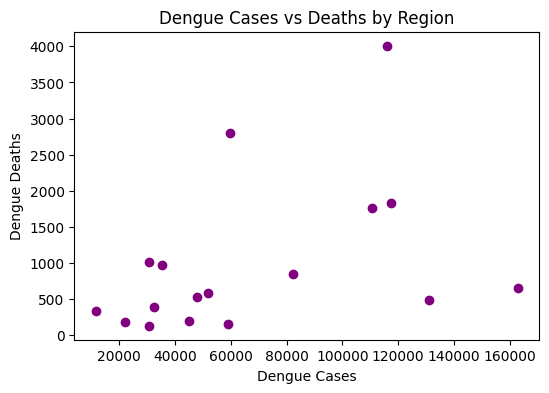

In [28]:
# Calculate the total cases and deaths per region
region_stats = den.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()

# Display the region-wise cases and deaths
print("Total Dengue cases and deaths by region:")
print(region_stats)

# Scatter plot comparing cases and deaths per region
plt.figure(figsize=(6, 4))
plt.scatter(region_stats['Dengue_Cases'], region_stats['Dengue_Deaths'], color='purple')
plt.title('Dengue Cases vs Deaths by Region')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.show()


<h1>16. Is the number of cases increasing or decreasing in each region?</h1>

Number of Dengue cases per year for each region:
Year          2016   2017   2018   2019   2020
Region                                        
BARMM         2191    485   2460   5393   1008
CAR           9164   4045   7584   8808    981
NCR          13002  26103  29200  40478   7183
Region I      8281   8236  15511  19867   7171
Region II     3891   5310  17678  16634   1628
Region III   20989  25200  31726  37158  15991
Region IV-A  24282  22421  30410  76195   9721
Region IV-B   3999   2770   8019  10984   5077
Region IX     7215   4274   6161  27447   2684
Region V      2532   3225   3548  11141   1721
Region VI    26170   9283  17582  60357   4131
Region VII   29395  15940  21889  31053  12406
Region VIII   5388   3916  10976  26871   4832
Region X     17680   6679  23497  28356   6225
Region XI    12137   3667   6316   8466   1936
Region XII   16013   9613   9173  20640   4363
Region XIII   7215   2988   9053  12054   3983


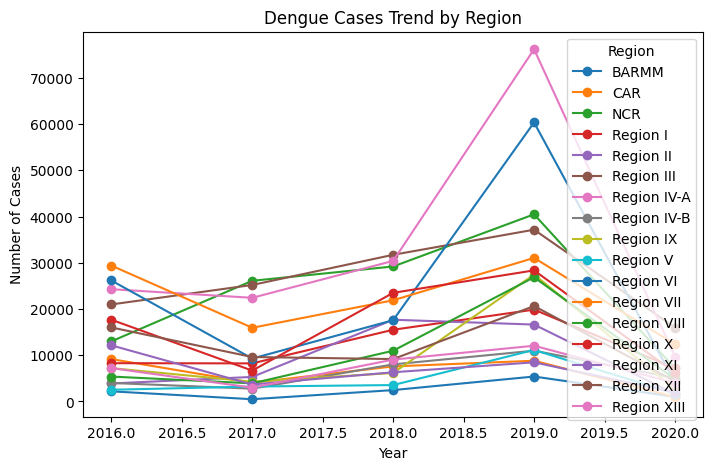

In [30]:
# Calculate the total number of Dengue cases per year for each region
region_trends = den.groupby(['Region', 'Year'])['Dengue_Cases'].sum().unstack()

# Display the trend of cases for each region
print("Number of Dengue cases per year for each region:")
print(region_trends)

# Plot the trend for each region
region_trends.T.plot(marker='o', figsize=(8, 5))
plt.title('Dengue Cases Trend by Region')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()


<h1>17. Do any regions consistently have high death rates?</h1>

Regions with consistently high Dengue death rates:
Region
NCR            66.800000
Region XII     46.600000
Region VI      30.416667
Region VII     29.333333
CAR            16.800000
Region XIII    16.100000
Region X       14.133333
Region IV-A    10.866667
Region VIII     9.750000
Region IX       8.866667
Region III      8.033333
Region XI       6.416667
BARMM           5.533333
Region II       3.216667
Region V        3.083333
Region I        2.616667
Region IV-B     2.166667
Name: Dengue_Deaths, dtype: float64


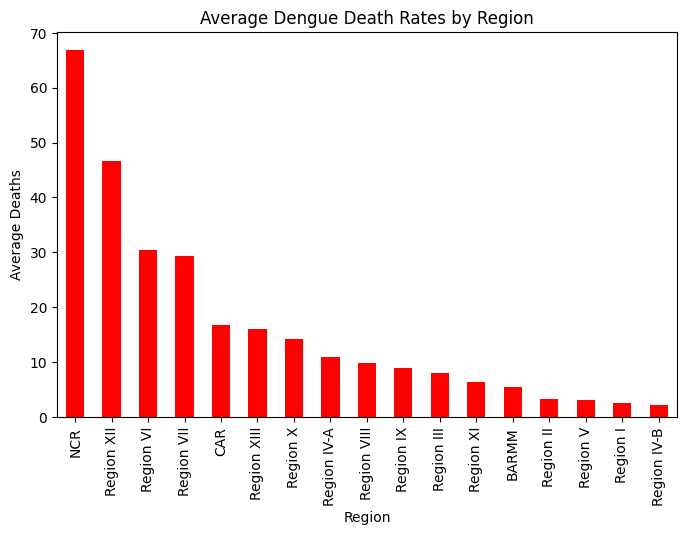

In [31]:
# Calculate the average number of Dengue deaths for each region
region_deaths = den.groupby('Region')['Dengue_Deaths'].mean().sort_values(ascending=False)

# Display regions with consistently high death rates
print("Regions with consistently high Dengue death rates:")
print(region_deaths)

# Plot the average death rates for each region
region_deaths.plot(kind='bar', color='red', figsize=(8, 5))
plt.title('Average Dengue Death Rates by Region')
plt.xlabel('Region')
plt.ylabel('Average Deaths')
plt.show()


<h1>18. Are deaths linked to certain months regardless of the region?</h1>

Number of Dengue deaths per month:
Month
April         200
August        714
December      404
February      315
January       394
July          611
June          322
March         291
May           162
November      613
October      6670
September    6148
Name: Dengue_Deaths, dtype: int64


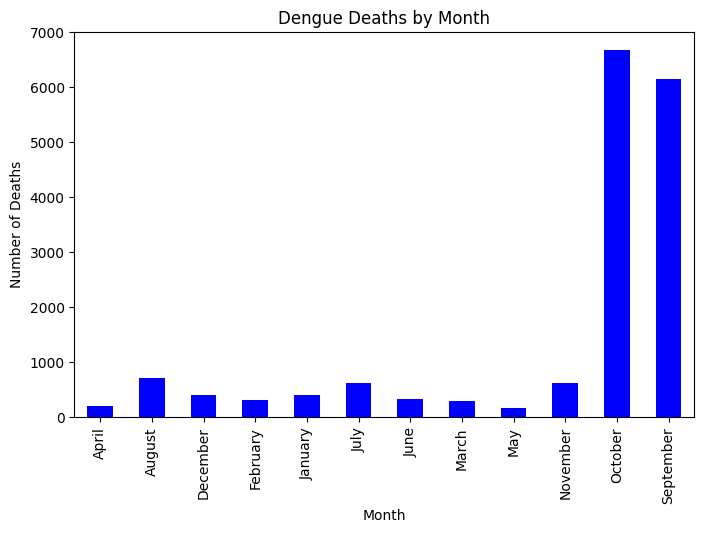

In [32]:
# Calculate the total number of Dengue deaths per month
monthly_deaths = den.groupby('Month')['Dengue_Deaths'].sum()

# Display the number of deaths per month
print("Number of Dengue deaths per month:")
print(monthly_deaths)

# Plot the deaths per month
monthly_deaths.plot(kind='bar', color='blue', figsize=(8, 5))
plt.title('Dengue Deaths by Month')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.show()


<h1>19. Do Dengue cases follow a seasonal pattern?</h1>

Number of Dengue cases by season:
Season
Dry      585576
Rainy    561849
Name: Dengue_Cases, dtype: int64


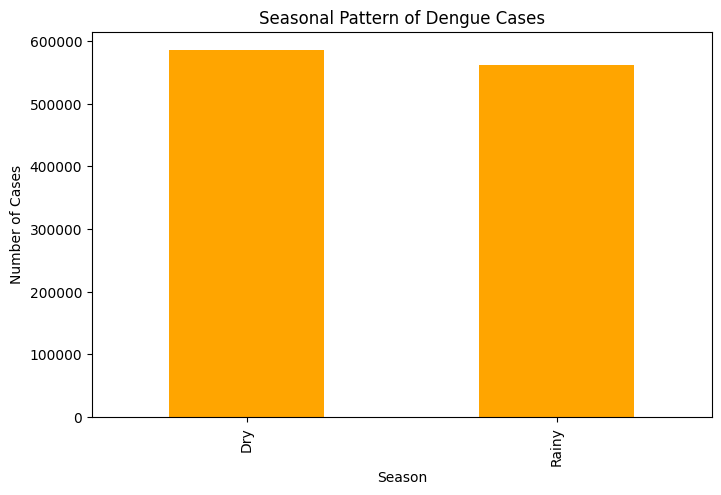

In [34]:
# Define the season based on the month
den['Season'] = den['Month'].apply(lambda x: 'Rainy' if x in ['June', 'July', 'August', 'September'] else 'Dry')

# Calculate the total number of Dengue cases per season
seasonal_cases = den.groupby('Season')['Dengue_Cases'].sum()

# Display the number of cases per season
print("Number of Dengue cases by season:")
print(seasonal_cases)

# Plot the seasonal distribution of cases
seasonal_cases.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Seasonal Pattern of Dengue Cases')
plt.xlabel('Season')
plt.ylabel('Number of Cases')
plt.show()


<h1>20. How do deaths compare between the highest and lowest case regions?</h1>

Deaths comparison between the highest and lowest Dengue case regions:
Region
BARMM          332
Region IV-A    652
Name: Dengue_Deaths, dtype: int64


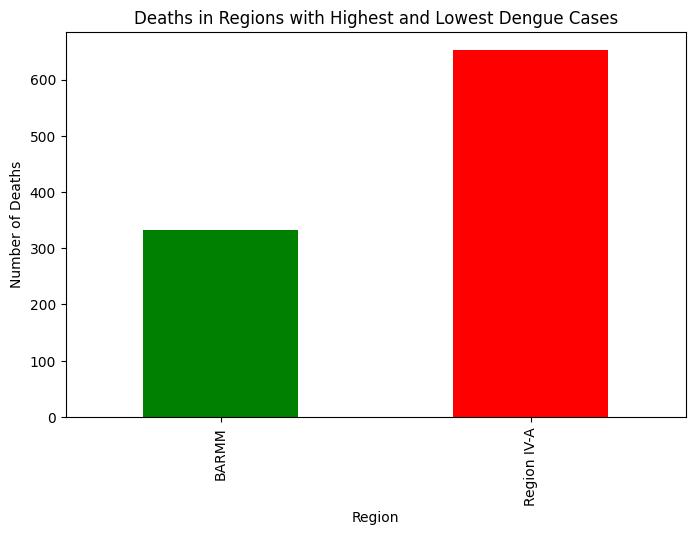

In [36]:
# Find the region with the highest and lowest number of Dengue cases
highest_region = den.groupby('Region')['Dengue_Cases'].sum().idxmax()
lowest_region = den.groupby('Region')['Dengue_Cases'].sum().idxmin()

# Get the number of deaths in the highest and lowest case regions
deaths_comparison = den[den['Region'].isin([highest_region, lowest_region])].groupby('Region')['Dengue_Deaths'].sum()

# Display the comparison
print("Deaths comparison between the highest and lowest Dengue case regions:")
print(deaths_comparison)

# Plot the deaths comparison
deaths_comparison.plot(kind='bar', color=['green', 'red'], figsize=(8, 5))
plt.title('Deaths in Regions with Highest and Lowest Dengue Cases')
plt.xlabel('Region')
plt.ylabel('Number of Deaths')
plt.show()


<h1>21. What is the distribution of Dengue cases across all months?</h1>

Distribution of Dengue cases across all months:
Month
January      85
February     85
March        85
April        85
May          85
June         85
July         85
August       85
September    85
October      85
November     85
December     85
Name: count, dtype: int64


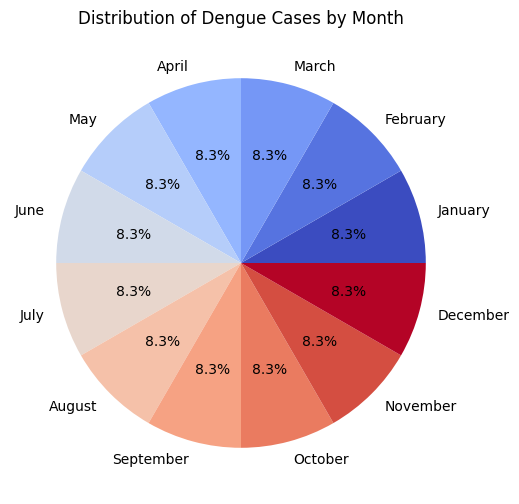

In [39]:
# Calculate the number of Dengue cases per month
case_distribution = den['Month'].value_counts()

# Display the distribution of cases per month
print("Distribution of Dengue cases across all months:")
print(case_distribution)

# Plot the case distribution
case_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colormap='coolwarm')
plt.title('Distribution of Dengue Cases by Month')
plt.ylabel('')
plt.show()


<h1>22. What is the correlation between Dengue cases and deaths?</h1>

Correlation between Dengue cases and deaths: 0.04


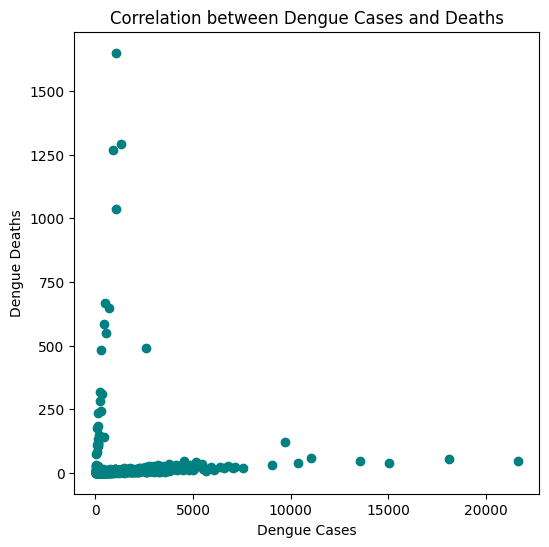

In [38]:
# Calculate the correlation between Dengue cases and deaths
correlation = den['Dengue_Cases'].corr(den['Dengue_Deaths'])

# Display the correlation value
print(f"Correlation between Dengue cases and deaths: {correlation:.2f}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(6, 6))
plt.scatter(den['Dengue_Cases'], den['Dengue_Deaths'], color='teal')
plt.title('Correlation between Dengue Cases and Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.show()


<h1>23. What percentage of total Dengue cases occurred in the top 3 regions?</h1>

Percentage of Dengue cases in the top 3 regions: 35.87%


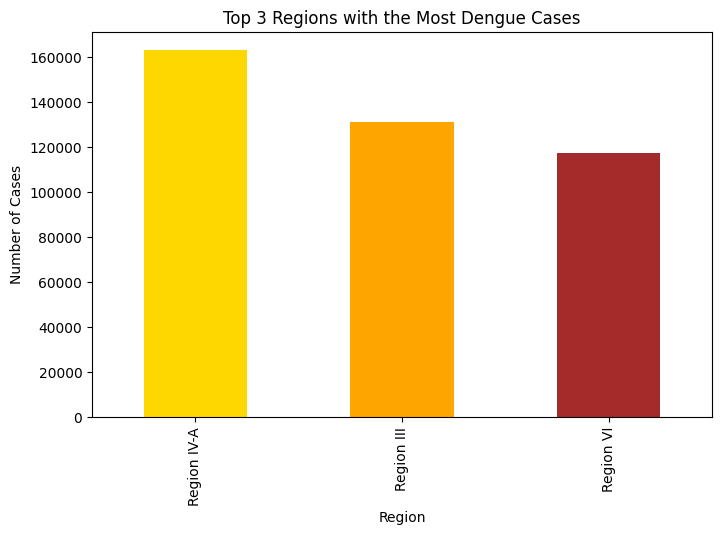

In [40]:
# Calculate the total Dengue cases per region
total_cases = den['Dengue_Cases'].sum()
top_3_regions = den.groupby('Region')['Dengue_Cases'].sum().nlargest(3)

# Calculate the percentage of cases in the top 3 regions
percentage_top_3 = (top_3_regions.sum() / total_cases) * 100

# Display the percentage of cases in the top 3 regions
print(f"Percentage of Dengue cases in the top 3 regions: {percentage_top_3:.2f}%")

# Plot the top 3 regions' contribution to total cases
top_3_regions.plot(kind='bar', color=['gold', 'orange', 'brown'], figsize=(8, 5))
plt.title('Top 3 Regions with the Most Dengue Cases')
plt.xlabel('Region')
plt.ylabel('Number of Cases')
plt.show()


<h1>24. Which region has the highest average number of Dengue cases per month?</h1>

Region with the highest average number of Dengue cases per month: Region IV-A


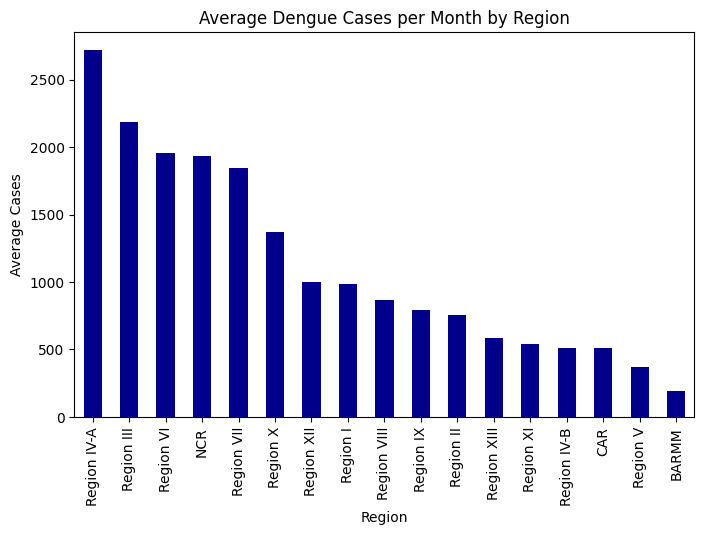

In [42]:
# Calculate the average number of Dengue cases per month for each region
avg_cases_per_region = den.groupby('Region')['Dengue_Cases'].mean().sort_values(ascending=False)

# Find the region with the highest average cases
highest_avg_region = avg_cases_per_region.idxmax()

# Display the region with the highest average cases
print(f"Region with the highest average number of Dengue cases per month: {highest_avg_region}")

# Plot the average cases per region
avg_cases_per_region.plot(kind='bar', color='darkblue', figsize=(8, 5))
plt.title('Average Dengue Cases per Month by Region')
plt.xlabel('Region')
plt.ylabel('Average Cases')
plt.show()
